In [1]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from adjustText import adjust_text
from scipy import stats
from venn import venn
import itertools

In [14]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
# file_name = 'longest.mk.vM_tG.tsv'
# file_name = 'longest.mk.vM_tG_pN.tsv'
# file_name = 'longest.mk.strict.vM_tG_pN.tsv'
# file_name = 'MK_test_vidCha_group/gene.longest.mk.tsv'
# file_name = 'MK_test_indInd_group/gene.longest.mk.tsv'

# db = 'vidMac'
# db = 'vidCha'
db = 'indInd'

file_name = 'MK_test_{}_ncbi/gene.longest.mk.tsv'.format(db)

file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')
df = df.dropna()

df.head()

,gene,transcript,scaffold,pN,pS,dN,dS,mk.raw.p.value,mk.odds.ni,dos
156,LATS2,XM_054390934.1,CM051081,1.0,1.0,13.000000,62.000000,0.332536,4.769231,-0.326667
201,FRY,XM_054388340.1,CM051081,1.0,12.0,9.000000,78.000000,1.000000,0.722222,0.026525
202,ZAR1L,XM_054389283.1,CM051081,2.0,2.0,33.333333,26.666667,1.000000,0.787879,0.055556
203,BRCA2,XM_054382717.1,CM051081,30.0,20.0,236.500000,94.500000,0.100901,0.597458,0.114502
205,LOC128969273,XM_054384067.1,CM051081,0.0,2.0,44.500000,24.500000,0.134576,0.000000,0.644928


In [15]:
# df['gene'] = [t.split('_')[0] for t in df['transcript']]
min_odds = df[df['mk.odds.ni'] != 0]['mk.odds.ni'].min()
max_odds = df[df['mk.odds.ni'] != float('inf')]['mk.odds.ni'].max()
df['corr.ni'] = [min_odds/4 if i==0 else max_odds*4 if i==float('inf') else i for i in df['mk.odds.ni']]
# df['adj.pval'] = smt.multipletests(list(df['mk.raw.p.value']), method='fdr_bh', is_sorted=False)[1]
df['log.pval'] = -np.log10(df['mk.raw.p.value'])
df['log.ni'] = -np.log10(df['corr.ni'])

In [16]:
## if you want to color plot by chromosome
chrZ = ['CM051124', 'JAQHUL010000048', 'JAQHUL010000053', 'JAQHUL010000095', 'JAQHUL010000123', 
        'JAQHUL010000125', 'JAQHUL010000393', 'JAQHUL010000438', 'JAQHUL010000478', 'JAQHUL010000912', 
        'JAQHUL010001315', 'JAQHUL010001454', 'MU790496', 'MU790497']

chrW = ['CM051123', 'JAQHUL010000090', 'JAQHUL010000098', 'JAQHUL010000119', 'JAQHUL010000132', 
        'JAQHUL010000162', 'JAQHUL010000235', 'JAQHUL010000251', 'JAQHUL010000366', 'JAQHUL010000503', 
        'JAQHUL010000510', 'JAQHUL010000624', 'JAQHUL010001019', 'JAQHUL010001216', 'JAQHUL010001238',
        'JAQHUL010001337', 'MU790483', 'MU790484', 'MU790485', 'MU790487', 'MU790490']

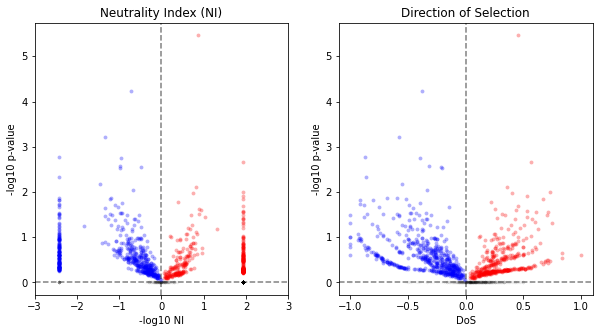

In [17]:
# selected_genes = ['GYS2', 'PTCHD1', 'LEMD2', 'NXPH3', 'LRRTM3', 'LEMD2', 'AGRN', 'CACNB1',
#                   'CNTNAP1', 'NLGN3', 'PCM1', 'SPTBN4', 'TNC', 'TUBGCP2', 'UNC5B', 'VPS13B']
# selected_genes = ['GRIN2C', 'NTRK2', 'PCM1', 'PKD1L2', 'TUBGCP2', 'TAS1R1', 'SI', 'TBC1D9', 'AAAS']
# selected_genes = ['NTRK2']
selected_genes = []


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes[0], axes[1]

# pval_cutoff = -np.log10(0.05)
pval_cutoff = -np.log10(1)

df_Dpos = df[(df['dos'] > 0) & (df['log.pval'] > pval_cutoff)]
df_Ddel = df[(df['dos'] < 0) & (df['log.pval'] > pval_cutoff)]
df_NIpos = df[(df['log.ni'] > 0) & (df['log.pval'] > pval_cutoff)]
df_NIdel = df[(df['log.ni'] < 0) & (df['log.pval'] > pval_cutoff)]

## get data for sex chromosomes
# df_Z = df[df['scaffold'].isin(chrZ)]
# df_W = df[df['scaffold'].isin(chrW)]

## Neutrality Index (OR)
sns.scatterplot(ax=ax1, data=df, x='log.ni', y='log.pval', alpha=0.01, linewidth=0, s=15, color='k')
sns.scatterplot(ax=ax1, data=df_NIpos, x='log.ni', y='log.pval', alpha=0.3, linewidth=0, s=15, color='red')
sns.scatterplot(ax=ax1, data=df_NIdel, x='log.ni', y='log.pval', alpha=0.3, linewidth=0, s=15, color='blue')

# color by chr
# sns.scatterplot(ax=ax1, data=df_Z, x='log.ni', y='log.pval', alpha=0.3, linewidth=0, s=15, color='red')
# sns.scatterplot(ax=ax1, data=df_W, x='log.ni', y='log.pval', alpha=0.3, linewidth=0, s=15, color='blue')

ax1.set_title('Neutrality Index (NI)')
ax1.set(xlabel='-log10 NI', ylabel='-log10 p-value')
ax1.set_xlim(-3,3)
ax1.axhline(pval_cutoff, color='k', alpha=0.5, ls='--')
ax1.axvline(0, color='k', alpha=0.5, ls='--')

## Directionality of Selection
sns.scatterplot(ax=ax2, data=df, x='dos', y='log.pval', alpha=0.01, linewidth=0, s=15, color='k')
sns.scatterplot(ax=ax2, data=df_Dpos, x='dos', y='log.pval', alpha=0.3, linewidth=0, s=15, color='red')
sns.scatterplot(ax=ax2, data=df_Ddel, x='dos', y='log.pval', alpha=0.3, linewidth=0, s=15, color='blue')

# color by chr
# sns.scatterplot(ax=ax2, data=df_Z, x='dos', y='log.pval', alpha=0.3, linewidth=0, s=15, color='red')
# sns.scatterplot(ax=ax2, data=df_W, x='dos', y='log.pval', alpha=0.3, linewidth=0, s=15, color='blue')

ax2.set_title('Direction of Selection')
ax2.set(xlabel='DoS', ylabel='-log10 p-value')
ax2.axhline(pval_cutoff, color='k', alpha=0.5, ls='--')
ax2.axvline(0, color='k', alpha=0.5, ls='--')


# labels = []
# for x, y, g in zip(df_NIpos['log.ni'], df_NIpos['log.pval'], df_NIpos['gene']):
#     if (g in selected_genes) or ((y > 1.95) and (not g.startswith('LOC')) and (not g.startswith('reg_'))):
#         labels.append(ax1.text(x=x, y=y, s=g, color='red', size=8))
        
# labels = []
# for x, y, g in zip(df_NIdel['log.ni'], df_NIdel['log.pval'], df_NIdel['gene']):
#     if (g in selected_genes) or ((y > 2.8) and (not g.startswith('LOC')) and (not g.startswith('reg_'))):
#         labels.append(ax1.text(x=x, y=y, s=g, color='blue', size=8))
        
# labels = []
# for x, y, g in zip(df_Dpos['dos'], df_Dpos['log.pval'], df_Dpos['gene']):
#     if (g in selected_genes) or ((y > 1.95) and (not g.startswith('reg_')) and (not g.startswith('LOC'))):
#         labels.append(ax2.text(x=x, y=y, s=g, color='red', size=8))

# labels = []
# for x, y, g in zip(df_Ddel['dos'], df_Ddel['log.pval'], df_Ddel['gene']):
#     if (g in selected_genes) or ((y > 2.8) and (not g.startswith('reg_')) and (not g.startswith('LOC'))):
#         labels.append(ax2.text(x=x, y=y, s=g, color='blue', size=8))
        
# pdf_name = 'ni.dos.pval_volcanos.mk_test.vM_tG.pdf'
# pdf_name = 'ni.dos.pval_volcanos.mk_test.vM_tG_pN.pdf'
# pdf_name = 'ni.dos.pval_volcanos.mk_test.strict.vM_tG_pN.pdf'
# pdf_name = 'ni.dos.pval_volcanos.mk_test.vC_tG_pN.pdf'
# pdf_name = 'ni.dos.pval_volcanos.mk_test.iI_pP_mA.no_label.pdf'
pdf_name = 'MK_test_{}_ncbi/ni.dos.pval_volcanos.mk_test.{}.ncbi.pdf'.format(db, db)

# fig.savefig(pdf_name, bbox_inches='tight')

In [14]:
df_Z

,gene,transcript,scaffold,pN,pS,dN,dS,mk.raw.p.value,mk.odds.ni,dos,corr.ni,log.pval,log.ni
13181,ACOT12,XM_054398278.1,CM051124,1.0,1.0,7.0,9.0,1.000000,1.285714,-0.062500,1.285714,-0.000000,-0.109144
13259,NPR2,XM_054397367.1,CM051124,0.0,1.0,5.0,82.0,1.000000,0.000000,0.057471,0.011905,-0.000000,1.924279
13261,RGP1,XM_054397822.1,CM051124,0.0,2.0,7.0,28.0,1.000000,0.000000,0.200000,0.011905,-0.000000,1.924279
13273,LOC128979310,XM_054397527.1,CM051124,1.0,2.0,17.5,30.5,1.000000,0.882353,0.031250,0.882353,-0.000000,0.054358
13414,CMYA5,XM_054397312.1,CM051124,26.0,13.0,442.0,231.0,1.000000,1.045249,-0.009906,1.045249,-0.000000,-0.019220
13509,CNTLN,XM_054397579.1,CM051124,9.0,4.0,5.0,6.0,0.408097,2.700000,-0.237762,2.700000,0.389237,-0.431364
13607,ROR2,XM_054397597.1,CM051124,3.0,4.0,1.0,1.0,1.000000,0.750000,0.071429,0.750000,-0.000000,0.124939
13700,CEP120,XM_054397747.1,CM051124,3.0,4.0,34.5,62.5,0.699599,1.367647,-0.072901,1.367647,0.155151,-0.135974
13719,ATG12,XM_054398001.1,CM051124,0.0,1.0,4.0,16.0,1.000000,0.000000,0.200000,0.011905,-0.000000,1.924279
13819,UNC13B,XM_054398324.1,MU790496,5.0,5.0,13.0,16.0,1.000000,1.230769,-0.051724,1.230769,-0.000000,-0.090177


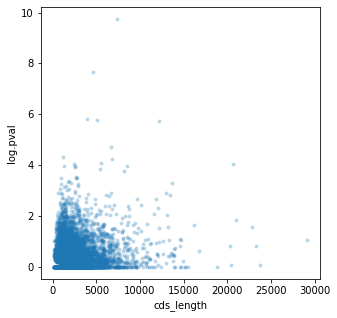

In [13]:
## Add CDS length
file_name = 'longest.transcript-counts.vM_tG_pN.tsv'
file_data = glob(dir_path + file_name)[0]
cds_df = pd.read_csv(file_data, sep='\t')
df_merged = pd.merge(df, cds_df, on='transcript')

## Correlation between significance and CDS length? NOPE
fig, axes = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_merged[df_merged['cds_length']<30000], y='log.pval', x='cds_length',
                alpha=0.3, linewidth=0, s=15)

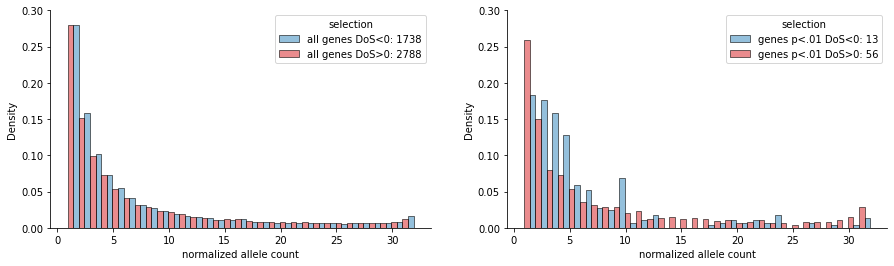

In [129]:
## Allele frequency spectra
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites/MK_test/'
file_name = 'AF.by_category.tsv'
file_data = glob(dir_path + file_name)[0]
af_df = pd.read_csv(file_data, sep='\t')
af_df['count'] = af_df['AF'] * 32

af_df_strong = af_df[af_df['selection'].isin(['strong_positive', 'strong_negative'])]
af_df_rand = af_df[af_df['selection'].isin(['rand_positive', 'rand_negative', 'all_positive', 'all_negative'])]

## plot
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axes[0], axes[1]
sns.set_palette(['#d7191c', '#2b83ba'])


sns.histplot(ax=ax1, data=af_df_rand, x='count', hue='selection', binwidth=1, 
             stat='density', common_norm=False, multiple="dodge", alpha=0.5)
sns.histplot(ax=ax2, data=af_df_strong, x='count', hue='selection', binwidth=1, 
             stat='density', common_norm=False, multiple="dodge", alpha=0.5)

ax1.set(xlabel='normalized allele count')
ax2.set(xlabel='normalized allele count')
ax1.legend(title='selection', loc='upper right', labels=['all genes DoS<0: 1738', 'all genes DoS>0: 2788'])
ax2.legend(title='selection', loc='upper right', labels=['genes p<.01 DoS<0: 13', 'genes p<.01 DoS>0: 56'])
ax1.set(ylim=(0, 0.3))
ax2.set(ylim=(0, 0.3))
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

pdf_name = 'spectra_AF_all_and_strong.pdf'

# fig.savefig(pdf_name, bbox_inches='tight')

all nonsyn variants DoS>0 vs DoS<0, p-value: 1.0
strong nonsyn variants DoS>0 vs DoS<0, p-value: 1.9303894371880403e-07


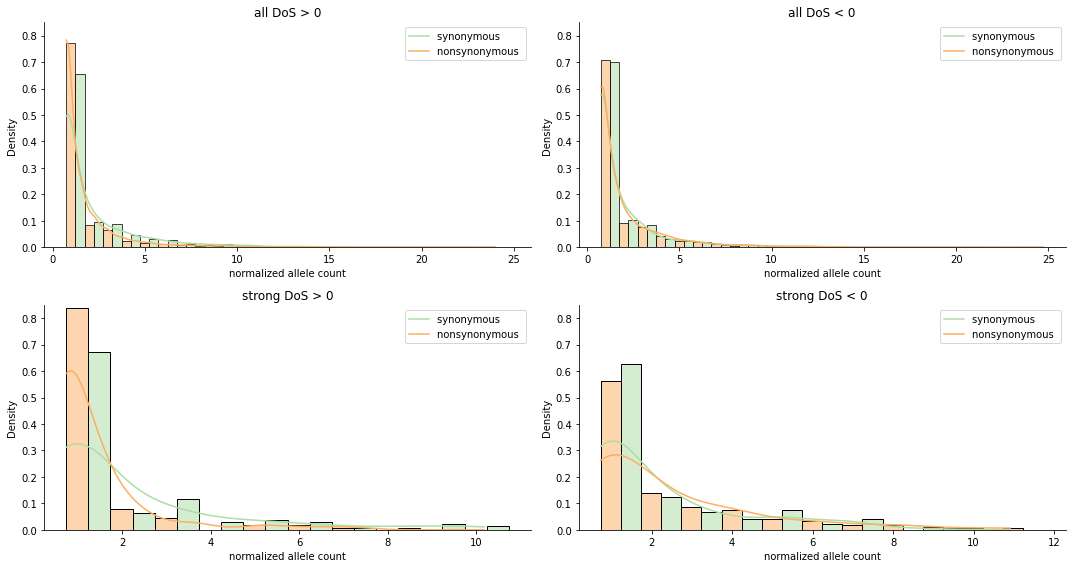

In [81]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
# file_name = 'strict_filt.AF.by_category.snpEff.tsv'
# file_name = 'MK_test_vidMac_group/snpEff/AF.by_category.snpEff.tsv'
file_name = 'MK_test_vidCha_group/snpEff/AF.by_category.snpEff.tsv'

file_data = glob(dir_path + file_name)[0]
af_df = pd.read_csv(file_data, sep='\t')
af_df['count'] = af_df['AF'] * 32

data_all_pos = af_df[af_df['selection_conservative'] == 'all_positive']
data_all_neg = af_df[af_df['selection_conservative'] == 'all_negative']
data_strong_pos = af_df[af_df['selection_conservative'] == 'strong_positive']
data_strong_neg = af_df[af_df['selection_conservative'] == 'strong_negative']
# af_df_strong = af_df[af_df['selection'].isin(['strong_positive', 'strong_negative'])]
af_df_rand = af_df[af_df['selection'].isin(['rand_positive', 'rand_negative', 'all_positive', 'all_negative'])]

## plot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
sns.set_palette(['#fdae61', '#abdda4'])

## all genes
sns.histplot(ax=ax1, data=data_all_pos, x='count', 
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

sns.histplot(ax=ax2, data=data_all_neg, x='count',
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

## strong genes
sns.histplot(ax=ax3, data=data_strong_pos, x='count', 
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

sns.histplot(ax=ax4, data=data_strong_neg, x='count',
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

ax1.set_title('all DoS > 0')
ax2.set_title('all DoS < 0')
ax3.set_title('strong DoS > 0')
ax4.set_title('strong DoS < 0')

for axi in [ax1, ax2, ax3, ax4]:
    axi.legend(title='', loc='upper right', labels=['synonymous ', 'nonsynonymous '])
    axi.set(xlabel='normalized allele count')
    axi.set(ylim=(0, 0.85))

fig.tight_layout()  
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

pdf_name = 'spectra_AF_sym_nonsym.all_and_strong.pos_and_neg.pdf'

# fig.savefig(pdf_name, bbox_inches='tight')


### Compare distributions
print('all nonsyn variants DoS>0 vs DoS<0, p-value: {}'.format(stats.ks_2samp(data_all_pos[data_all_pos['impact'] == 'missense_variant']['AF'], 
               data_all_neg[data_all_neg['impact'] == 'missense_variant']['AF'], 
               alternative='two-sided')[1]))
print('strong nonsyn variants DoS>0 vs DoS<0, p-value: {}'.format(stats.ks_2samp(data_strong_pos[data_strong_pos['impact'] == 'missense_variant']['AF'], 
               data_strong_neg[data_strong_neg['impact'] == 'missense_variant']['AF'], 
               alternative='two-sided')[1]))

In [32]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
# dbs = ['vidMac', 'vidCha']
dbs = ['indInd', 'indInd_ground', 'indInd_tree']
# file_names = ['MK_test_vidMac_group/gene.longest.mk.tsv', 'MK_test_vidCha_group/gene.longest.mk.tsv']
dir_names = ['MK_test_indInd_group', 'MK_test_indInd_ground', 'MK_test_indInd_tree']

D = {}
for i in range(len(dbs)):
    db = dbs[i]
    file_name = '{}/gene.longest.mk.tsv'.format(dir_names[i])
    file_data = glob(dir_path + file_name)[0]
    d = pd.read_csv(file_data, sep='\t')
    d = d.dropna()
    D[db] = d
    i += 1

In [33]:
def get_genes_dos_pval(d, dos, pval):
    ## returns list of genes from dataframe according to requested thresholds
    
    if dos == 'pos':
        return set(d[(d['dos'] > 0) & (d['mk.raw.p.value'] < pval)]['gene'])
    if dos == 'neg':
        return set(d[(d['dos'] < 0) & (d['mk.raw.p.value'] < pval)]['gene'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


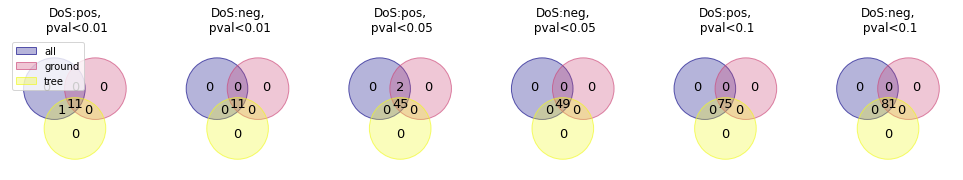

In [44]:
## Calculate overlap between dbs
# d1 = D['vidMac']
# d2 = D['vidCha']
d1 = D['indInd']
d2 = D['indInd_ground']
d3 = D['indInd_tree']
# db_sets = [ 'vidMac_str_pos', 'vidMac_str_neg', 'vidMac_pos', 'vidMac_neg',
#             'vidCha_str_pos', 'vidCha_str_neg', 'vidCha_pos', 'vidCha_neg']


fig, axes = plt.subplots(1, 6, figsize=(17, 12))


x = [('pos', .01), ('neg', .01), ('pos', .05), ('neg', .05), ('pos', .1), ('neg', .1)]
# x = [('pos', .01), ('neg', .01), ('pos', .05), ('neg', .05)]

for i in range(len(x)):
    db_set = x[i]
    dos = db_set[0]
    pval = db_set[1]
    all_db_sets = {}
    set_info1 = 'indInd_{}_{}'.format(dos, pval)
    set_info2 = 'indInd_ground_{}_{}'.format(dos, pval)
    set_info3 = 'indInd_tree_{}_{}'.format(dos, pval)
    all_db_sets[set_info1] = get_genes_dos_pval(d1, dos, pval)
    all_db_sets[set_info2] = get_genes_dos_pval(d2, dos, pval)
    all_db_sets[set_info3] = get_genes_dos_pval(d3, dos, pval)
#     print(all_db_sets[set_info1] & all_db_sets[set_info2]) 
    
    axi = axes[i]
    venn(all_db_sets, cmap='plasma', alpha=0.3, ax=axi)
    axi.set_title('DoS:{},\n pval<{}'.format(dos, pval))
    if i != 0:
        axi.legend(frameon=False)
    else:
        axi.legend(loc='upper left', labels=['all', 'ground', 'tree'])
        
# pdf_name = 'venns.DoS_pval.vidMac_vidCha.pdf'
pdf_name = 'venns.DoS_pval.indInd_all_ground_tree.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')

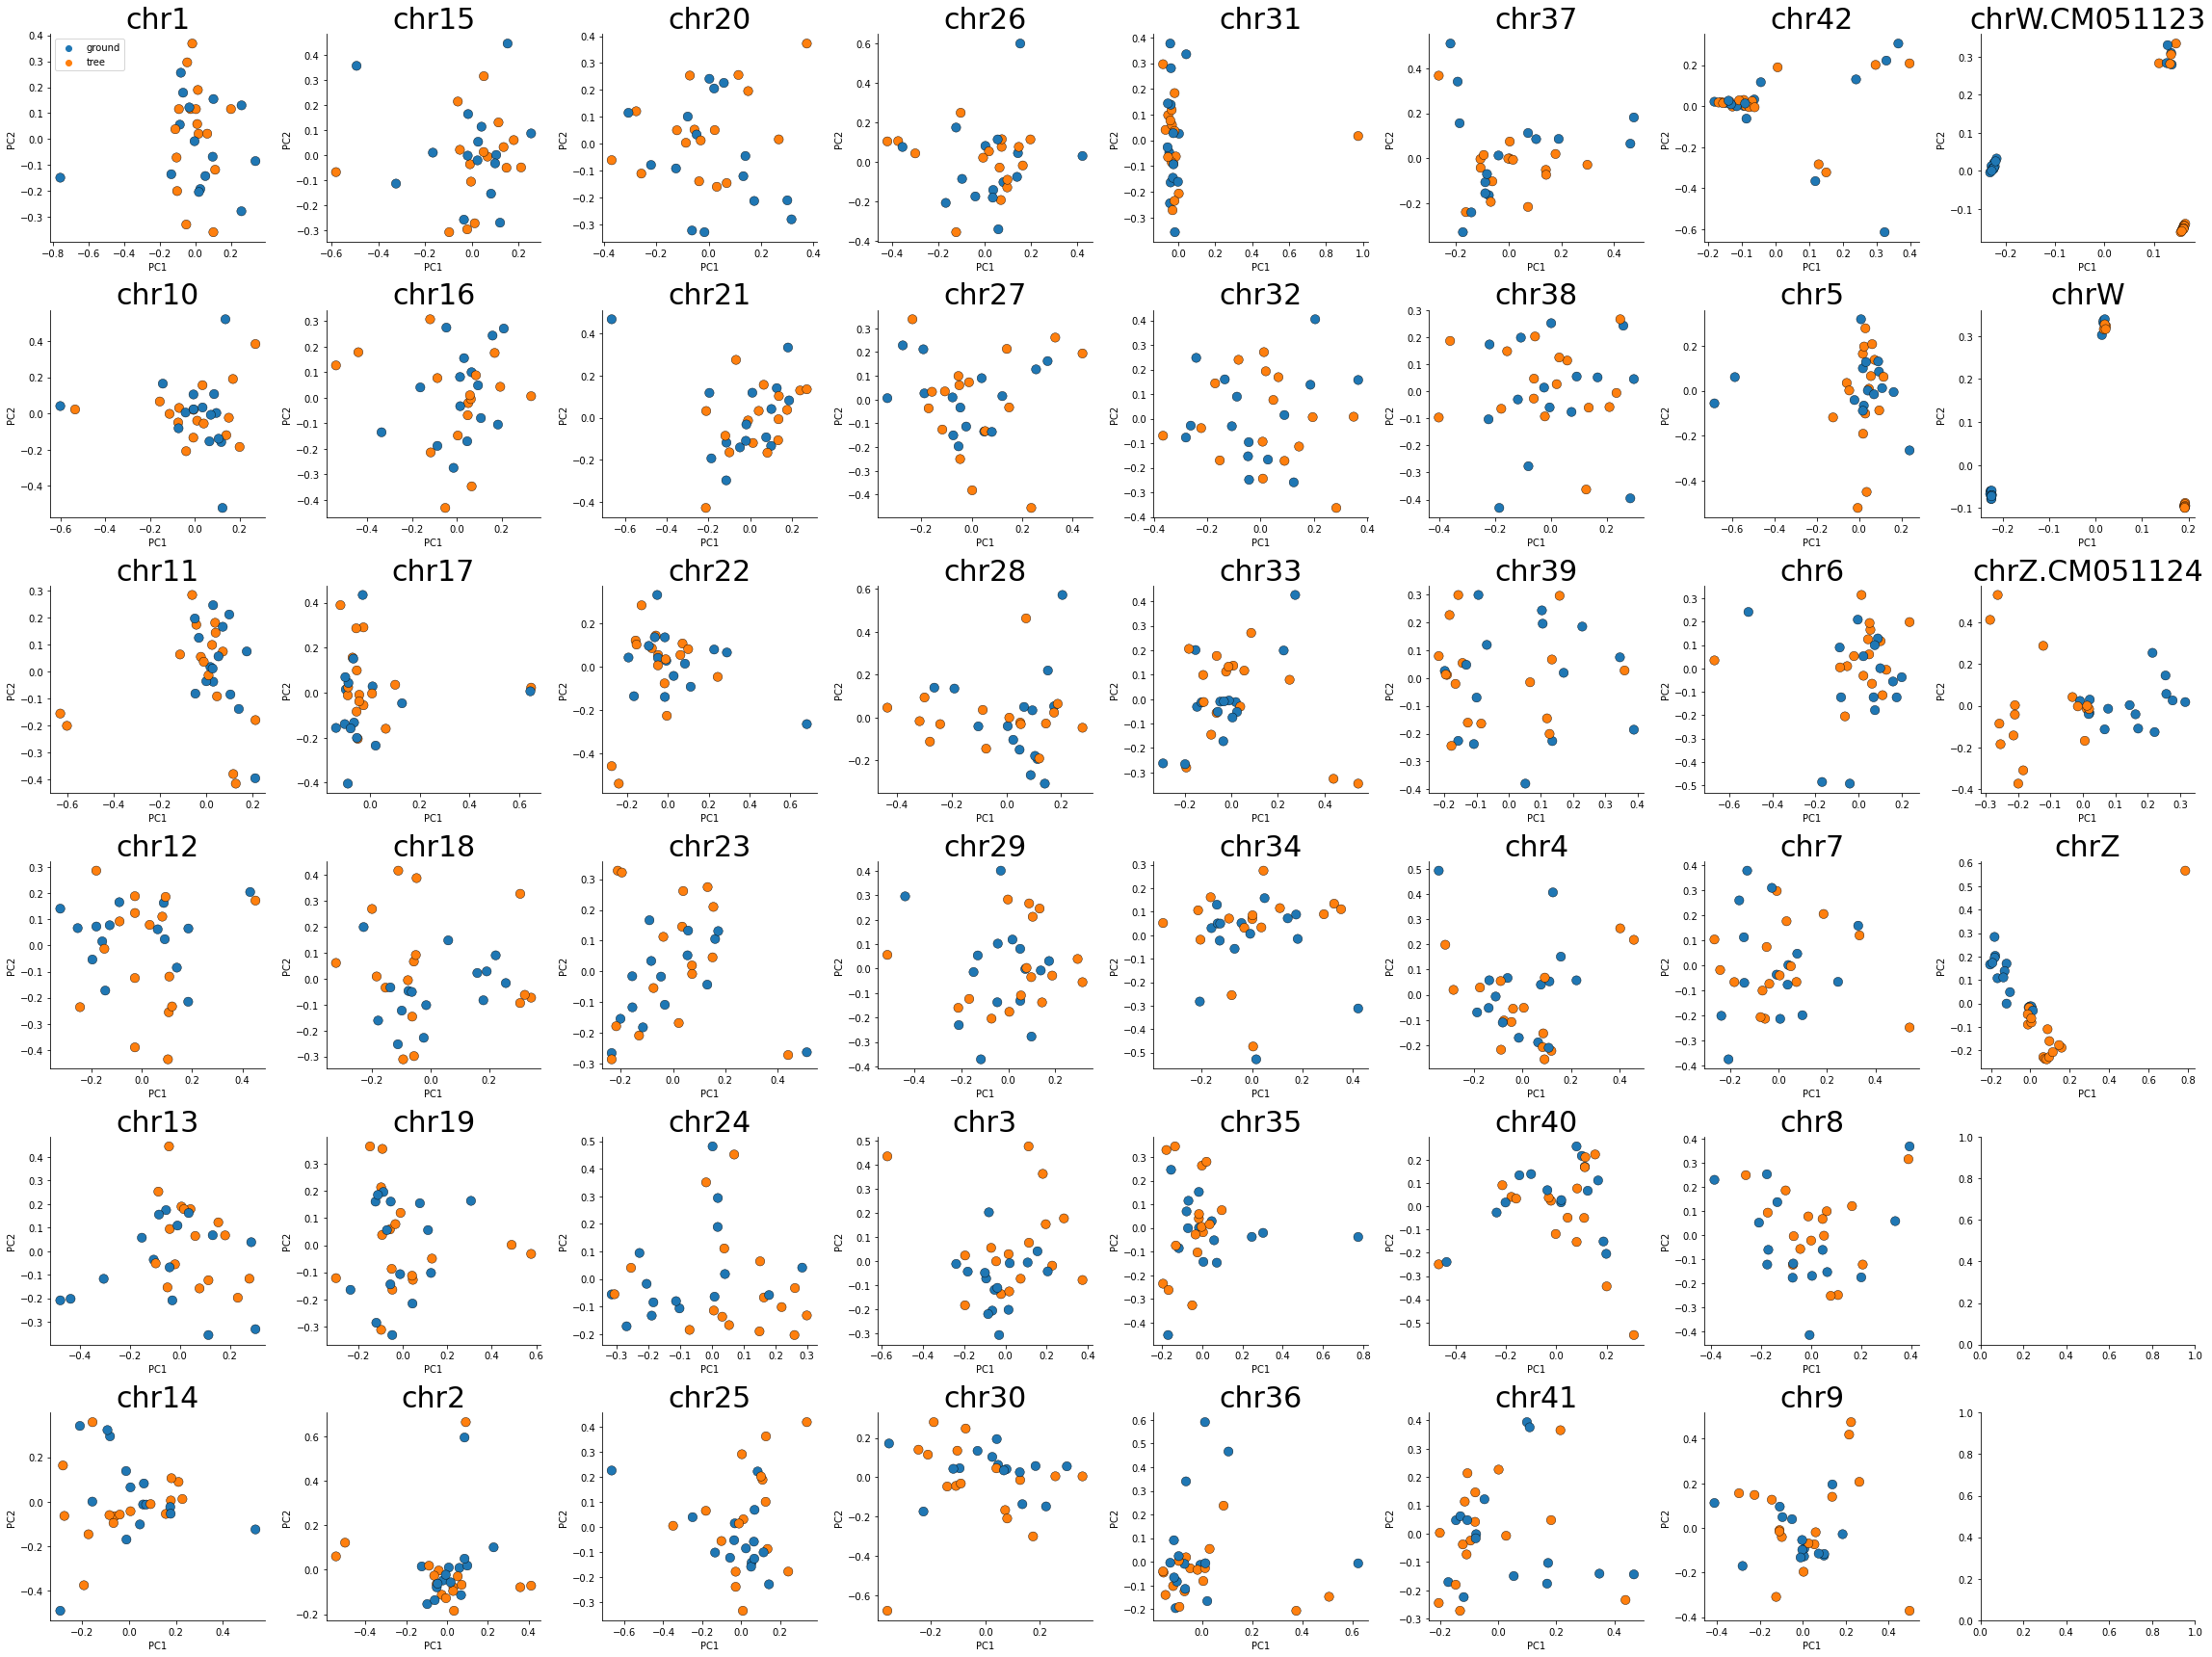

In [26]:
## Do tree and ground honeyguides separate (PCA) if we look chr by chr?
vector_path = 'split_by_chr_PCA_indInd/'
vector_files = [dir_path + vector_path + f for f in listdir(dir_path + vector_path) if f.endswith('labeled')]
vector_files = sorted(vector_files)

fig, axes = plt.subplots(6, 8, figsize=(4*8, 4*6))

for j in range(8):
    for i in range(6):        
        k = 6 * j + i
        try:
            f = vector_files[k]
        except IndexError:
            break
            
        pca_df = pd.read_csv(f, sep='\t')
        axi = axes[i][j]
        sns.scatterplot(ax=axi, data=pca_df, x='PC1', y='PC2', hue='population',
                        s=90, edgecolor='k', linewidth=0.4)
        title = f.replace(dir_path + vector_path, '').replace('.passed.indInd.pca.eigenvec.labeled', '')
        axi.set_title('{}'.format(title), fontsize=30)

        fig.tight_layout()  
        sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
        
        if (i == 0) and (j == 0):
            axi.legend().set_title('')
        else:
            axi.legend([], [], frameon=False)            

pdf_name = 'PCA_samples.by_chromosome.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')

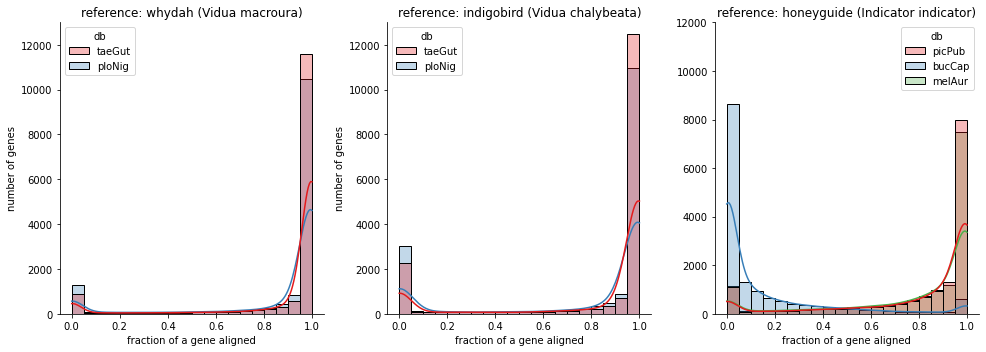

In [5]:
## Alignmnets from minimap2: what fraction of CDS do they cover?
file_name = 'Alignment_minimap_cov/bedcov_from_minimap2.tsv'
file_data = glob(dir_path + file_name)[0]
bedcov_df = pd.read_csv(file_data, sep='\t')

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.histplot(ax=axes[0], data=bedcov_df[bedcov_df['ref'] == 'vidMac'], x='fraction', hue='db',
             bins=20, kde=True, alpha=0.3, palette='Set1')
sns.histplot(ax=axes[1], data=bedcov_df[bedcov_df['ref'] == 'vidCha'], x='fraction', hue='db',
             bins=20, kde=True, alpha=0.3, palette='Set1')
sns.histplot(ax=axes[2], data=bedcov_df[bedcov_df['ref'] == 'indInd'], x='fraction', hue='db',
             bins=20, kde=True, alpha=0.3, palette='Set1')
# sns.histplot(ax=axes[2], data=bedcov_df[(bedcov_df['ref'] == 'indInd') & (bedcov_df['db'] != 'melAur')],
#              x='fraction', hue='db', bins=20, kde=True, alpha=0.3, palette='Set1')


axes[0].set_title('reference: whydah (Vidua macroura)')
axes[0].set(xlabel='fraction of a gene aligned', ylabel='number of genes')
axes[0].set(ylim=(0, 13000))
# axes[0].legend(title='', loc='upper left', labels=['zebra ficnh', 'weaver'])

axes[1].set_title('reference: indigobird (Vidua chalybeata)')
axes[1].set(xlabel='fraction of a gene aligned', ylabel='number of genes')
axes[1].set(ylim=(0, 13000))
# axes[1].legend(title='', loc='upper left', labels=['zebra ficnh', 'weaver'])

axes[2].set_title('reference: honeyguide (Indicator indicator)')
axes[2].set(xlabel='fraction of a gene aligned', ylabel='')
axes[2].set(ylim=(0, 12000))
# axes[2].legend(title='', loc='upper left', labels=['downy woodpecker', 'puffbird', 'golden-fronted woodpecker'])
# axes[2].legend(title='', loc='upper left', labels=['downy woodpecker', 'golden-fronted woodpecker'])
# axes[2].legend(title='', loc='upper left', labels=['downy woodpecker', 'puffbird'])


fig.tight_layout()  
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

# pdf_name = 'bedcov.fraction_of_genes_aligned.with_minimap2.no_woodpecker.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')

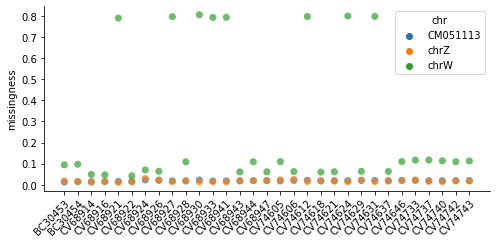

In [33]:
### Which honeyguide samples are male / female?
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
file_name = 'PopGen_indInd/missing_data.by_chr.tsv'

file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')
df.head()
fig, axes = plt.subplots(figsize=(7, 3.5))
sns.scatterplot(data=df, y='missing', x='sample', hue='chr', linewidth=0, alpha=0.7, s=50)

plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
axes.set(xlabel='', ylabel='missingness')
fig.tight_layout()  
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

pdf_name = 'missingness_chrW_chrZ.indInd.to_male_female.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')